In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

# Завантажуємо датасет
df = pd.read_csv('winequality-red.csv')
df_copy = df.copy()

print(f'Кількість зразків: {df_copy.shape[0]}')
print(f'Кількість ознак: {df_copy.shape[1]}')

Кількість зразків: 1599
Кількість ознак: 12


In [46]:
# Видалення цільової змінної
X = df_copy.drop(columns=['quality'])

# Стандартизуємо дані для кластеризації
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Зменшення розмірності за допомогою PCA (якщо необхідно)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

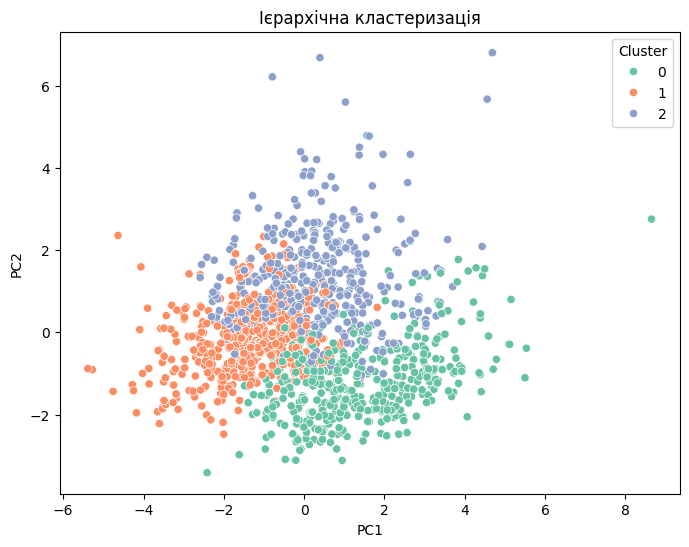

In [47]:
from sklearn.cluster import AgglomerativeClustering

# Кластеризація методом агломеративної кластеризації
# Агломеративна кластеризація — це метод ієрархічної кластеризації, який працює за принципом "знизу-вгору" (bottom-up). Спочатку кожен об'єкт є окремим кластером, а потім ці кластери поступово об'єднуються в більші, поки не буде досягнуто бажаної кількості кластерів.
hierarchical = AgglomerativeClustering(n_clusters=3)
y_hierarchical = hierarchical.fit_predict(X_scaled)

# Візуалізація результатів
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_hierarchical, palette='Set2')
plt.title('Ієрархічна кластеризація')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster', loc='best')
plt.show()

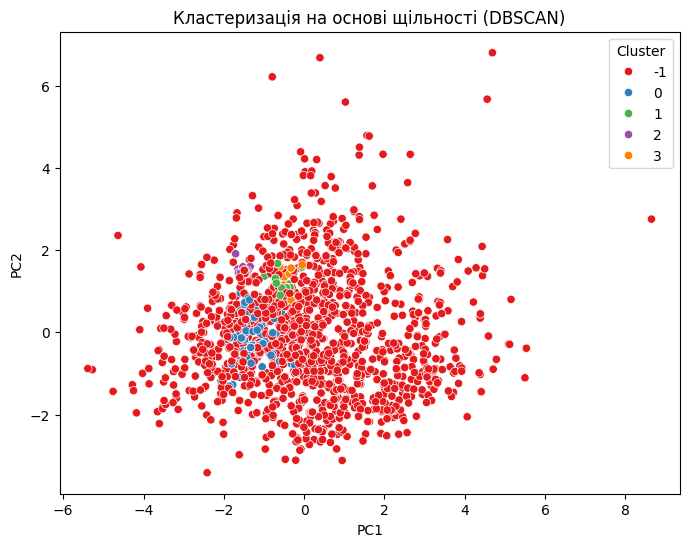

In [48]:
from sklearn.cluster import DBSCAN

# Кластеризація за допомогою DBSCAN
# алгоритм кластеризації на основі щільності, який групує точки в кластери, якщо вони знаходяться в області з високою щільністю точок, і позначає точки, які не належать жодному кластеру, як "шум
dbscan = DBSCAN(eps=1, min_samples=12)
y_dbscan = dbscan.fit_predict(X_scaled)

# Візуалізація результатів
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_dbscan, palette='Set1')
plt.title('Кластеризація на основі щільності (DBSCAN)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster', loc='best')
plt.show()

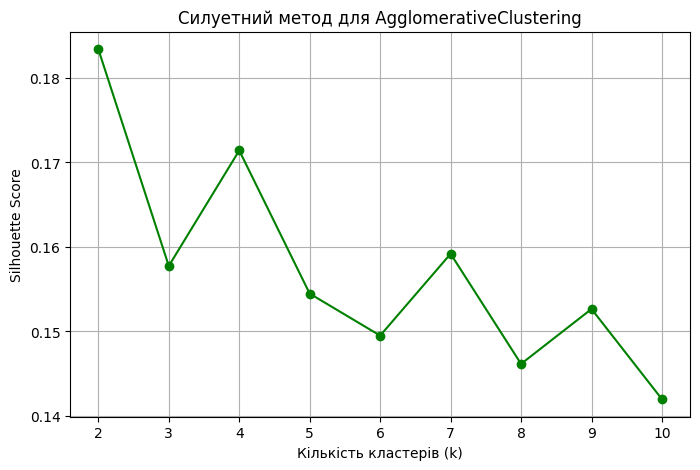

[0.1834016196435372, 0.15774678821183297, 0.17141826625212286, 0.1544755989439944, 0.14950267249567725, 0.15918825744106746, 0.14615466591713364, 0.15265477013371725, 0.1419748109189498]
Оптимальне k за силуетом (Agglomerative): 2


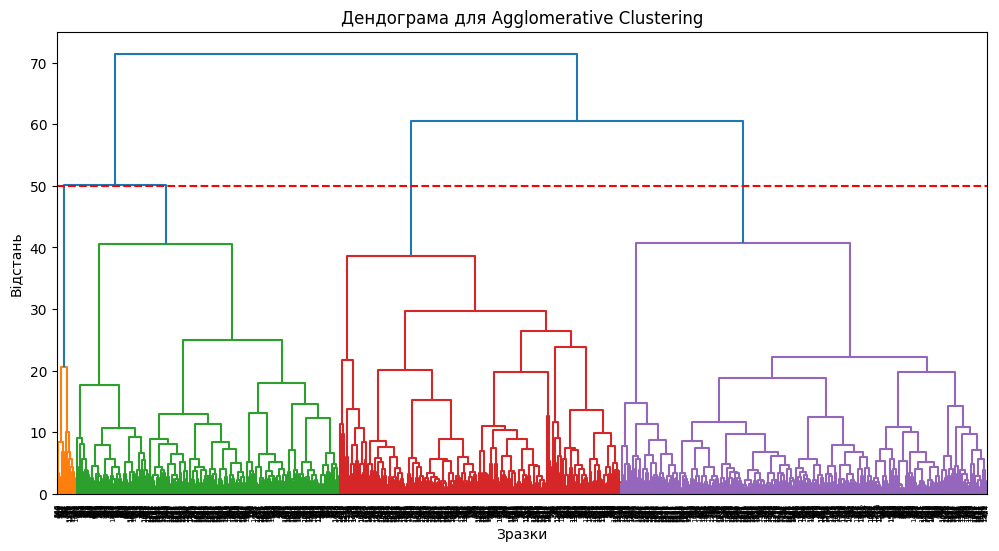

In [59]:
import scipy.cluster.hierarchy as sch

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Візуалізація
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Силуетний метод для AgglomerativeClustering')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

print(silhouette_scores)
optimal_k_silhouette_aggl = K_range[np.argmax(silhouette_scores)]
print(f'Оптимальне k за силуетом (Agglomerative): {optimal_k_silhouette_aggl}')



plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Дендограма для Agglomerative Clustering')
plt.xlabel('Зразки')
plt.ylabel('Відстань')
plt.axhline(y=50, color='r', linestyle='--')  # лінія обрізки для вибору кластерів
plt.show()

hierarchical = AgglomerativeClustering(n_clusters=3)
y_hierarchical = hierarchical.fit_predict(X_scaled)

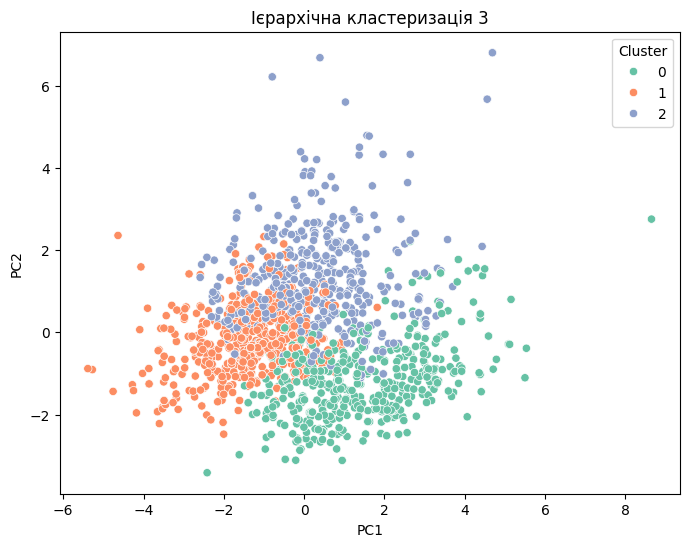

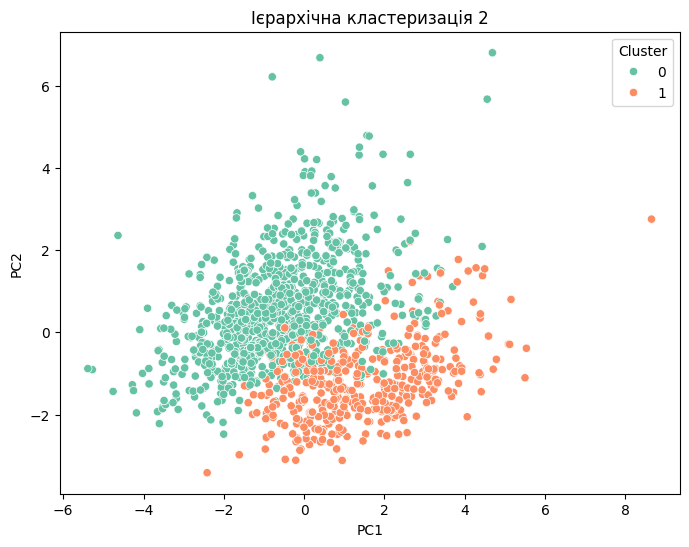

In [52]:
# Візуалізація результатів
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_hierarchical, palette='Set2')
plt.title('Ієрархічна кластеризація 3')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster', loc='best')
plt.show()

hierarchical = AgglomerativeClustering(n_clusters=2)
y_hierarchical = hierarchical.fit_predict(X_scaled)

# Візуалізація результатів
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_hierarchical, palette='Set2')
plt.title('Ієрархічна кластеризація 2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster', loc='best')
plt.show()

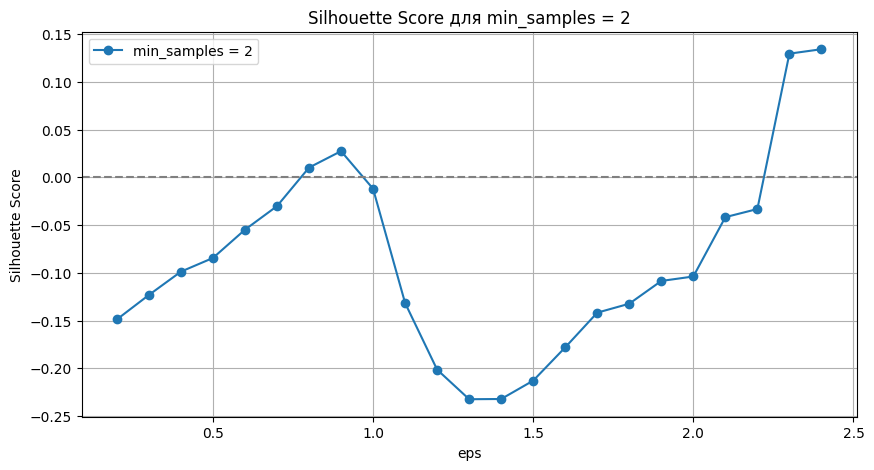

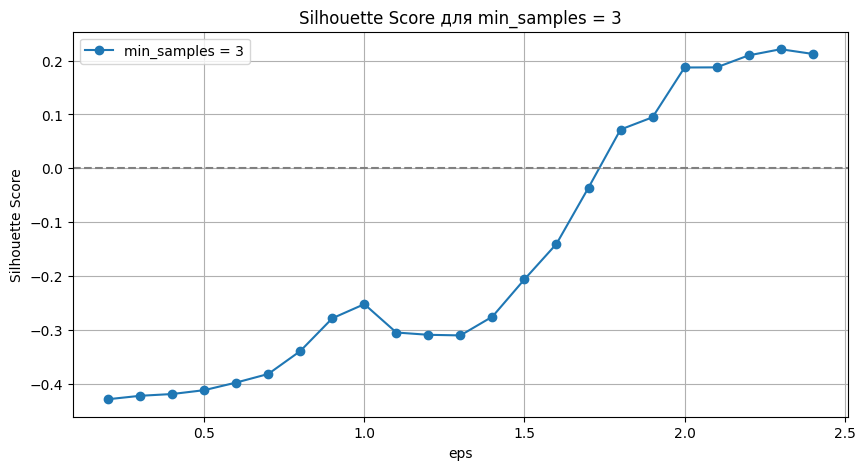

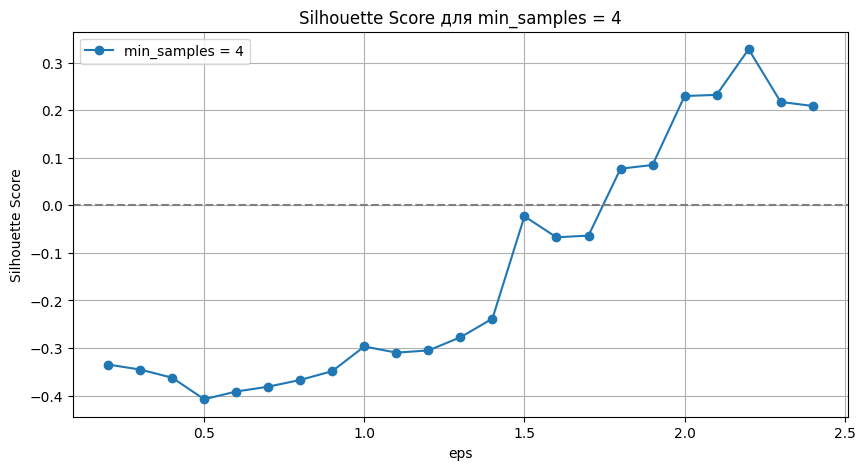

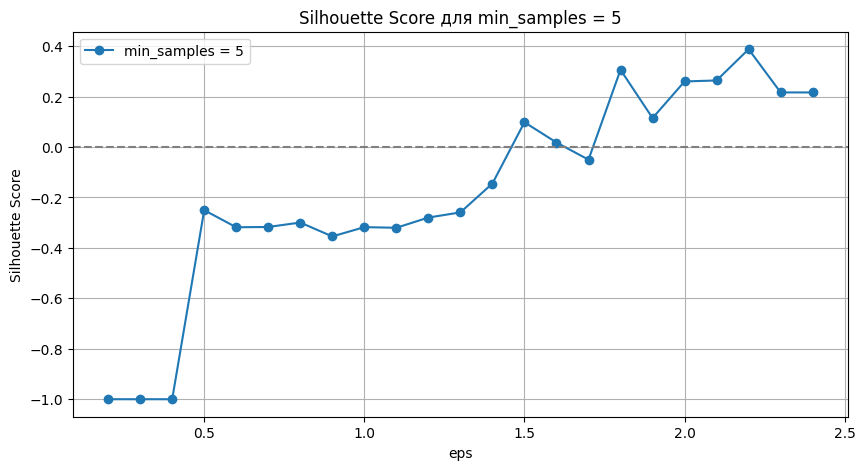

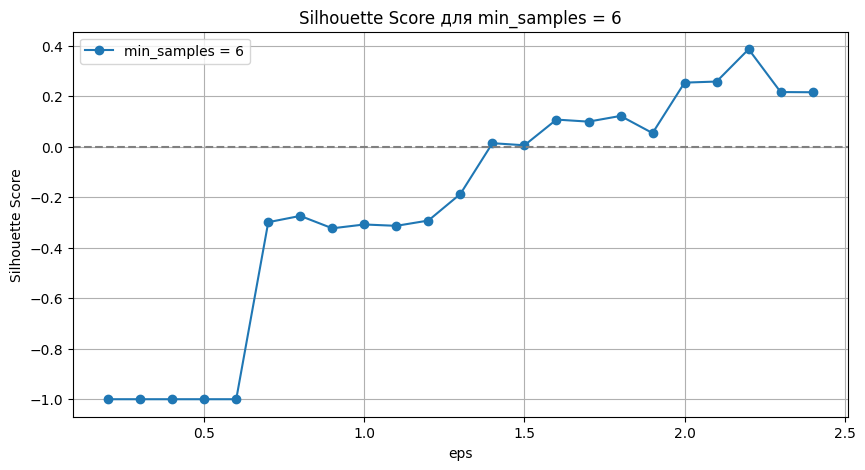

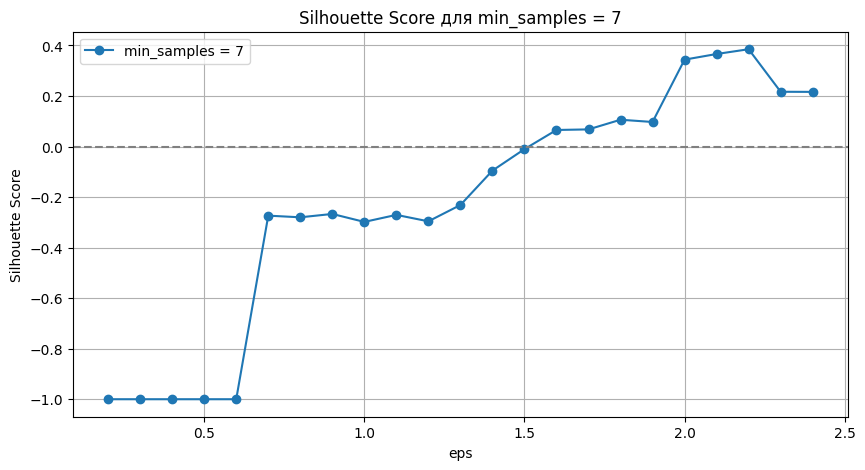

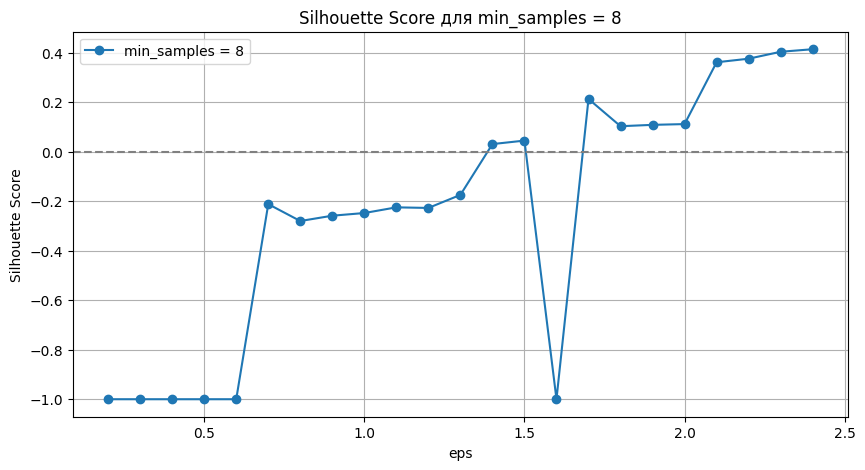

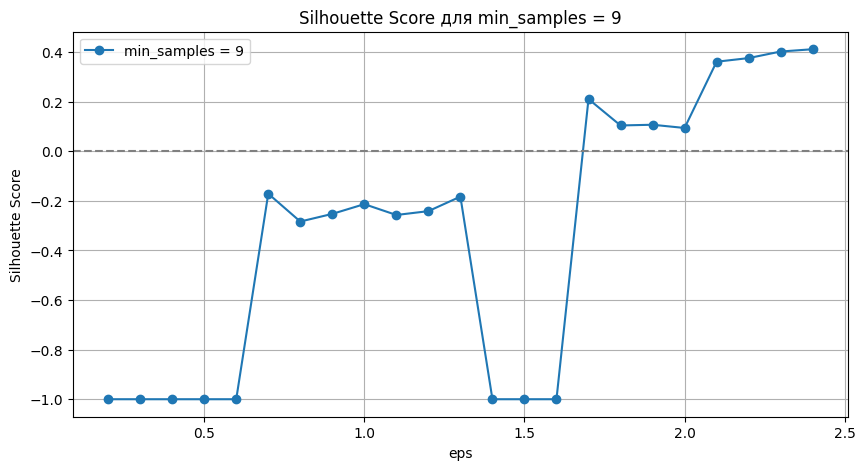

In [89]:
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Діапазони eps і min_samples
eps_range = np.arange(0.2, 2.5, 0.1)
min_samples_range = range(2, 10)

# Місце для зберігання результатів
silhouette_scores = []
cluster_counts = []

# Перебір усіх значень eps і min_samples
for min_samples in min_samples_range:
    for eps in eps_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # Якщо є хоча б два кластери, розраховуємо Silhouette Score
        if n_clusters > 1:
            score = silhouette_score(X_scaled, labels)
            silhouette_scores.append((eps, min_samples, score))
        else:
            silhouette_scores.append((eps, min_samples, -1))

        # Кількість кластерів
        cluster_counts.append((eps, min_samples, n_clusters))

# Перетворення результатів на масиви для побудови графіка
silhouette_scores = np.array(silhouette_scores)
cluster_counts = np.array(cluster_counts)

# Окремі графіки для Silhouette Score для кожного min_samples
for min_samples in min_samples_range:
    scores = silhouette_scores[silhouette_scores[:, 1] == min_samples][:, 2]
    
    plt.figure(figsize=(10, 5))
    plt.plot(eps_range, scores, marker='o', label=f'min_samples = {min_samples}')
    plt.xlabel('eps')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score для min_samples = {min_samples}')
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.show()

(2.400000000000001, 8)


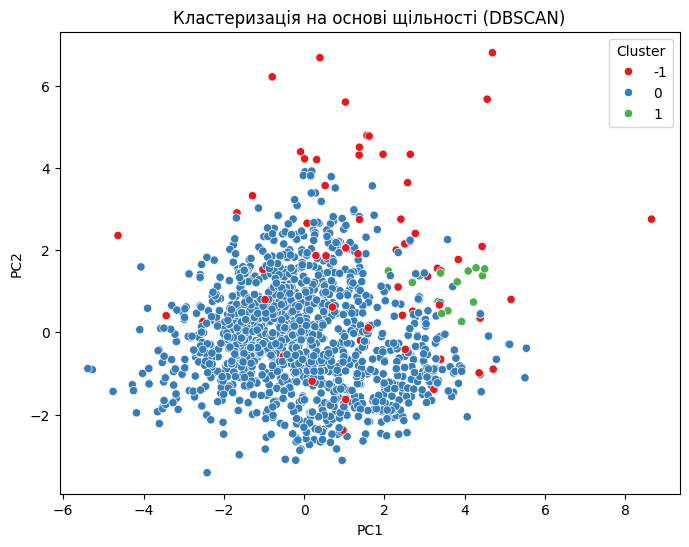

In [90]:
best_eps, best_min_samples = best_params
print(best_params)

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
y_dbscan = dbscan.fit_predict(X_scaled)

# Візуалізація результатів
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_dbscan, palette='Set1')
plt.title('Кластеризація на основі щільності (DBSCAN)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster', loc='best')
plt.show()

In [91]:
# Оцінити якість кластеризації
agglo = AgglomerativeClustering(n_clusters=optimal_k_silhouette_aggl)
agglo_labels = agglo.fit_predict(X_scaled)

# Метрики
sil_agglo = silhouette_score(X_scaled, agglo_labels)
ch_agglo = calinski_harabasz_score(X_scaled, agglo_labels)

print(f'[AgglomerativeClustering]')
print(f'Silhouette Score: {sil_agglo:.4f}')
print(f'Calinski-Harabasz Index: {ch_agglo:.2f}')

[AgglomerativeClustering]
Silhouette Score: 0.1834
Calinski-Harabasz Index: 271.17


In [40]:
# Використовуємо best_eps, підібране раніше
dbscan = DBSCAN(eps=best_eps, min_samples=cluster_counts[best_index])
db_labels = dbscan.fit_predict(X_pca)

# Фільтруємо шум (-1)
mask = db_labels != -1
X_db_filtered = X_scaled[mask]
db_labels_filtered = db_labels[mask]

if len(set(db_labels_filtered)) > 1:
    sil_db = silhouette_score(X_db_filtered, db_labels_filtered)
    ch_db = calinski_harabasz_score(X_db_filtered, db_labels_filtered)

    print(f'\n[DBSCAN]')
    print(f'Silhouette Score: {sil_db:.4f}')
    print(f'Calinski-Harabasz Index: {ch_db:.2f}')
else:
    print("\n[DBSCAN] Недостатньо кластерів для оцінки (усе в шумі або один кластер)")


[DBSCAN]
Silhouette Score: 0.3082
Calinski-Harabasz Index: 16.64


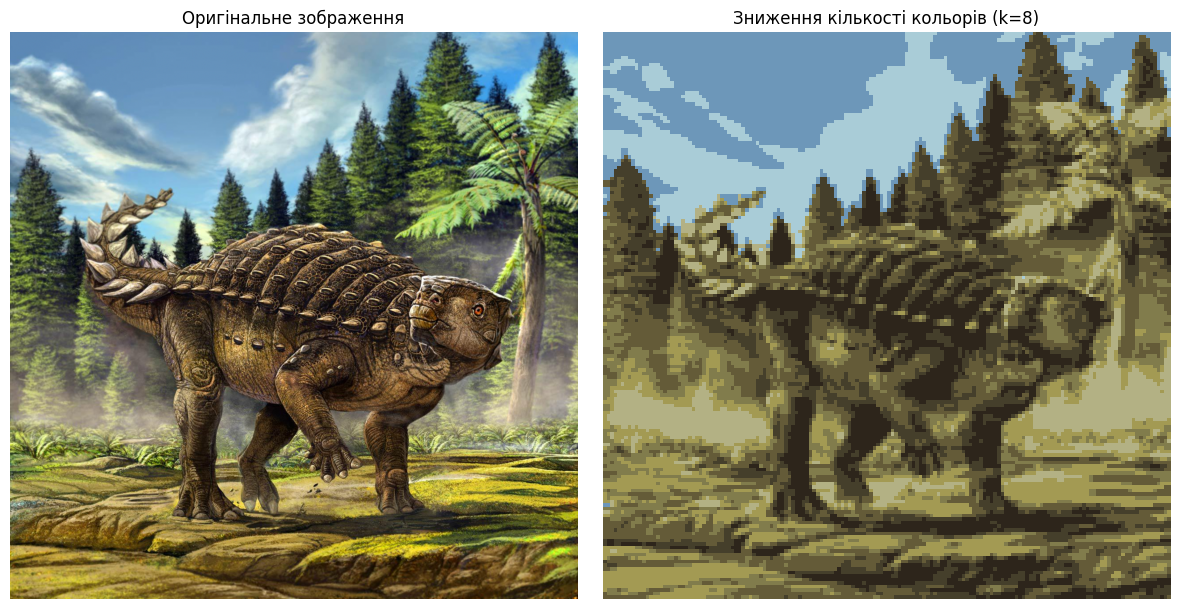

In [76]:
# Завантажуємо зображення
image = io.imread('photo.jpg')
image = image / 255.0  # Нормалізація

# Зменшуємо зображення для оптимізації пам'яті (наприклад, в 8 разів)
image_resized = resize(image, (image.shape[0] // 8, image.shape[1] // 8), anti_aliasing=True)

# Перетворюємо зображення в 2D масив пікселів
pixels = image_resized.reshape(-1, 3)

# Масштабуємо пікселі
scaler = StandardScaler()
pixels_scaled = scaler.fit_transform(pixels)

# Ієрархічна кластеризація (Agglomerative Clustering)
n_clusters = 8  # Кількість кольорів (кластерів)
agglo = AgglomerativeClustering(n_clusters=n_clusters)
labels = agglo.fit_predict(pixels_scaled)

# Визначаємо кольори для кожного кластера
cluster_colors = np.array([pixels[labels == i].mean(axis=0) for i in range(n_clusters)])

# Сегментація зображення за кластерними мітками
segmented_pixels = np.array([cluster_colors[labels[i]] for i in range(len(labels))])
segmented_img = segmented_pixels.reshape(image_resized.shape)

# Візуалізація результатів
plt.figure(figsize=(12, 6))

# Оригінальне зображення
plt.subplot(1, 2, 1)
plt.title("Оригінальне зображення")
plt.imshow(image)
plt.axis('off')

# Зниження кількості кольорів
plt.subplot(1, 2, 2)
plt.title(f"Зниження кількості кольорів (k={n_clusters})")
plt.imshow(segmented_img)
plt.axis('off')

plt.tight_layout()
plt.show()